In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from imageio import imread, imwrite
import random, gc, pickle, os
from PIL import Image
from skimage.transform import resize
from os.path import exists, isfile, join
from math import log

# Load Data

In [2]:
def load_folder_list(path=""):
    return [os.path.join(path, o) for o in os.listdir(path) if os.path.isdir(os.path.join(path, o))]

In [3]:
def get_data_path(img_folder):

    img_path = load_folder_list(path = img_folder)
    img_path.sort()

    return img_path

In [4]:
def get_data_name(data_path):

    if exists(data_path):
           data_name = [f for f in os.listdir(data_path) if isfile(join(data_path,f))]
            
    data_name.sort()
    return data_name

In [5]:
def get_data(img_path):

    name = get_data_name(img_path)
    img = []
    
    for p in tqdm(range(len(name))):
        img.append(Image.open(join(img_path, name[p])))
    
    return img

In [6]:
img_path = "Processed/preimage"
img = get_data(img_path)

100%|██████████| 2/2 [00:00<00:00, 140.88it/s]


In [7]:
len(img), np.array(img[0]).shape

(2, (512, 512))

In [8]:
np.max(np.array(img[0])), np.min(np.array(img[0]))

(255, 0)

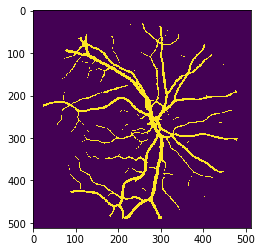

In [9]:
plt.imshow(img[0])

# Resize Image to power of 2

In [ ]:
def res_img(image, size):
    img = []
    for i in tqdm(range(len(image))):
        img.append(image[i].resize(size))
    return img

In [ ]:
size = (int(pow(2, round(log(np.array(img[0]).shape[0], 2)))), int(pow(2, round(log(np.array(img[0]).shape[1], 2)))))
print(size)

In [ ]:
image = res_img(img, (512, 512))

In [ ]:
np.array(image[0]).shape

In [ ]:
plt.imshow(image[0])

# Save the image

In [ ]:
for j in tqdm(range(len(image))):
    img_savepath = "Resized/preimage/"+str(j+1)+".png"
    image[j].save(img_savepath)